In [1]:
# coding:utf8
import pandas as pd
import time
import numpy as np
import urllib, json

In [2]:
import seaborn as sns

In [3]:
class PropertySamp(object):
    def getData(self):
        url = 'https://htem-api.nrel.gov/api/sample/'+str(self.id)+'/mvl_opt'
        response = urllib.request.urlopen(url)
        data = json.loads(response.read())
        wl0=data['library-spectra-measurement']['data'][0]['wavelength']['value']
        rf=data['library-spectra-measurement']['data'][0]['reflectance']['value']
        wl1=data['library-spectra-measurement']['data'][1]['wavelength']['value']
        tr=data['library-spectra-measurement']['data'][1]['transmittance']['value']
        df0=pd.DataFrame({'reflectance':rf},index=wl0)
        self.rf=df0.stack().unstack(0)
        df1=pd.DataFrame({'transmittance':tr},index=wl1)
        self.tr=df1.stack().unstack(0)
        url = 'https://htem-api.nrel.gov/api/sample/'+str(self.id)+'/mvl_ele'
        #There is the potential to replace this with mvl_optical or mvl_xrd, 
            #but these seem to be broken at the moment...
        response = urllib.request.urlopen(url)
        data = json.loads(response.read())
        rs=data['library-conductivity-resistivity-measurement']['data'][0]['resistivity']['value']
        cd=data['library-conductivity-resistivity-measurement']['data'][0]['conductivity']['value']
        sr=data['library-conductivity-resistivity-measurement']['data'][0]['sheet-resistance']['value']
        self.ele=pd.DataFrame({'resistivity':[rs],'conductivity':[cd],'sheet-resistance':[sr]})
        
    def __init__(self,id):
        self.id=id
        self.getData()

In [33]:
class PropertyLib(object):
    def __init__(self,id):
        self.id = id
        self.sample=[]
        self.getData()
    def getData(self):
        url = 'https://htem-api.nrel.gov/api/sample_library/'+str(self.id)
        response = urllib.request.urlopen(url)
        data = json.loads(response.read())
        positions = data['sample_ids']
        for p in positions:
            self.sample.append(PropertySamp(p))
        index=[s.id for s in self.sample]
        self.rf=pd.concat([s.rf for s in self.sample],axis=0)
        self.rf.index=index
        self.tr=pd.concat([s.tr for s in self.sample],axis=0)
        self.tr.index=index
        self.ele=pd.concat([s.ele for s in self.sample],axis=0)
        self.ele.index=index
       
        

In [3]:
class PropertyELESamp(object):
    def getData(self):
        url = 'https://htem-api.nrel.gov/api/sample/'+str(self.id)+'/mvl_ele'
        response = urllib.request.urlopen(url)
        data = json.loads(response.read())
        rs=data['library-conductivity-resistivity-measurement']['data'][0]['resistivity']['value']
        cd=data['library-conductivity-resistivity-measurement']['data'][0]['conductivity']['value']
        sr=data['library-conductivity-resistivity-measurement']['data'][0]['sheet-resistance']['value']
        x=data['library-conductivity-resistivity-measurement']['point']['coordinates']['x']['value']
        y=data['library-conductivity-resistivity-measurement']['point']['coordinates']['y']['value']
        self.ele=pd.DataFrame({'resistivity':[rs],'conductivity':[cd],'sheet-resistance':[sr],'x':[x],'y':[y]})
        
    def __init__(self,id):
        self.id=id
        self.getData()

In [4]:
class PropertyELELib(object):
    def __init__(self,id):
        self.id = id
        self.sample=[]
        self.getData()
    def getData(self):
        url = 'https://htem-api.nrel.gov/api/sample_library/'+str(self.id)
        response = urllib.request.urlopen(url)
        data = json.loads(response.read())
        positions = data['sample_ids']
        for p in positions:
            self.sample.append(PropertyELESamp(p))
        index=[s.id for s in self.sample]
        self.ele=pd.concat([s.ele for s in self.sample],axis=0)
        self.ele.index=index

In [5]:
elelab=PropertyELELib(6651)

In [6]:
ele=elelab.ele

In [7]:
ele

,resistivity,conductivity,sheet-resistance,x,y
207590,2.031798,0.492175,70485.680,5.400000,6.650000
207592,1.656615,0.603640,56881.800,9.400000,6.650000
207591,1.283643,0.779033,44370.060,13.400000,6.650000
207594,0.973676,1.027036,33030.200,17.400000,6.650000
207593,0.740462,1.350508,24463.050,21.400000,6.650000
207596,0.519837,1.923679,17628.200,25.400000,6.650000
207595,0.373994,2.673838,12580.220,29.400000,6.650000
207598,0.278820,3.586540,9003.694,33.400000,6.650000
207597,0.196309,5.094008,6418.545,37.400000,6.650000
207602,0.137533,7.270984,4633.136,41.400000,6.650000


In [8]:
ele['z']=ele['sheet-resistance']/ele.resistivity

In [9]:
ele=ele[['x','y','z','resistivity']]

In [10]:
ele['x']=ele['x'].map(float)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
ele['y']=ele['y'].map(float)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
ele.to_json('ele.json',orient="values")

In [14]:
singlesample=PropertySamp(207598)

In [15]:
tmp=singlesample.tr.stack().unstack(0)

In [16]:
tmp['in']=[k-int(k) for k in tmp.index ]

In [17]:
cleantr=tmp[tmp['in']==0.0]

In [18]:
cleanrf=singlesample.rf.stack().unstack(0)

In [19]:
cleandata=singlesample.tr.stack().unstack(0)

In [20]:
cleandata=cleanrf.merge(cleandata,left_index=True,right_index=True)

In [21]:
cleandata['absorbility']=1-cleandata.reflectance-cleandata.transmittance

In [22]:
cleandata['wavelength']=cleandata.index

In [29]:
cleandata.stack().unstack(0).to_json('xrd.json',orient='values')

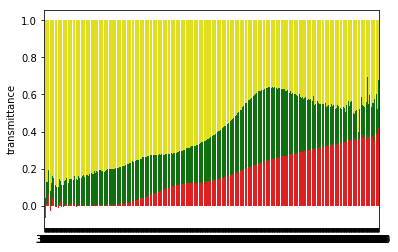

In [96]:
sns.barplot(x=cleandata.index,y=[1 for k in cleandata.index],color='black')
sns.barplot(x=cleandata.index,y=cleandata.transmittance+cleandata.reflectance,color='green')
sns.barplot(x=cleandata.index,y=cleandata.transmittance,color='red')
#简易demo

In [86]:
#厚度 34565

singlesample.ele

,resistivity,conductivity,sheet-resistance
0,1.283643,0.779033,44370.06


In [9]:
#厚度 34691
singlesample.ele

,resistivity,conductivity,sheet-resistance
0,2.031798,0.492175,70485.68


In [10]:
pr1=PropertyLib(6651)

In [13]:
pr1.tr

,898.1185302734375,904.892822265625,911.66357421875,918.4308471679688,925.1948852539062,931.9556884765625,938.7134399414062,945.4682006835938,952.2200927734375,958.9692993164062,...,1632.339599609375,1634.050537109375,1635.76123046875,1637.4718017578125,1639.18212890625,1640.892333984375,1642.602294921875,1644.3121337890625,1646.0218505859375,1647.7314453125
207590,0.295696,0.297726,0.301347,0.302514,0.308481,0.312308,0.314199,0.318315,0.321535,0.324050,...,0.232658,0.228818,0.225633,0.234588,0.237852,0.227734,0.229307,0.248421,0.227480,0.230095
207592,0.284043,0.285228,0.289756,0.290788,0.295901,0.300201,0.300674,0.305686,0.309641,0.311488,...,0.225985,0.215272,0.232960,0.223326,0.227793,0.223332,0.229134,0.235024,0.220216,0.230533
207591,0.267478,0.268320,0.272888,0.274491,0.280216,0.283612,0.284685,0.288936,0.291585,0.293828,...,0.217550,0.212483,0.223420,0.217398,0.218199,0.213850,0.225332,0.231771,0.207555,0.229217
207594,0.248407,0.247304,0.253685,0.255479,0.260759,0.264497,0.265869,0.268769,0.273964,0.274327,...,0.213395,0.212882,0.211116,0.217101,0.213247,0.210633,0.215310,0.218948,0.198215,0.234920
207593,0.229616,0.231303,0.233401,0.236668,0.241060,0.244453,0.245502,0.250308,0.252542,0.255277,...,0.204079,0.213811,0.201576,0.209988,0.207366,0.209109,0.206152,0.218756,0.196555,0.212547
207596,0.210654,0.211756,0.214933,0.218440,0.221770,0.224564,0.226529,0.231043,0.232264,0.233393,...,0.200806,0.199336,0.208489,0.203764,0.207676,0.191500,0.207707,0.219713,0.191573,0.215179
207595,0.192556,0.193232,0.197133,0.199724,0.203622,0.206777,0.207489,0.211983,0.212716,0.214666,...,0.201309,0.197078,0.204618,0.200356,0.204735,0.191839,0.210126,0.215120,0.191781,0.205528
207598,0.175468,0.178805,0.181286,0.183051,0.187326,0.190548,0.191400,0.195756,0.196682,0.198931,...,0.201435,0.197078,0.209457,0.198874,0.206592,0.202506,0.203732,0.212823,0.190951,0.205966
207597,0.161745,0.164463,0.166546,0.167822,0.172599,0.174590,0.176503,0.179227,0.180148,0.183814,...,0.199547,0.195618,0.210562,0.194280,0.204890,0.197257,0.205460,0.217416,0.194686,0.208160
207602,0.149284,0.150281,0.154205,0.156473,0.159607,0.162105,0.164073,0.165699,0.167754,0.170558,...,0.204205,0.206374,0.208489,0.202430,0.212318,0.197088,0.211854,0.215503,0.195932,0.208599


In [12]:
pr1.rf

,300,301,302,303,304,305,306,307,308,309,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
207590,0.121679,0.127175,0.131819,0.107849,0.134368,0.118492,0.119966,0.118905,0.118694,0.122144,...,0.225652,0.215835,0.256010,0.195598,0.216922,0.216172,0.190276,0.237127,0.195167,0.257240
207592,0.135420,0.127456,0.125964,0.116618,0.118294,0.119707,0.111896,0.102206,0.116581,0.127422,...,0.137438,0.236953,0.256227,0.182179,0.249133,0.201980,0.179343,0.209592,0.247473,0.288956
207591,0.121873,0.121245,0.140567,0.099541,0.120611,0.128783,0.124046,0.115475,0.104046,0.134545,...,0.191395,0.218027,0.246368,0.183384,0.182466,0.210809,0.217644,0.227717,0.215272,0.237407
207594,0.130177,0.129684,0.125046,0.113987,0.135395,0.124860,0.104788,0.117488,0.130688,0.118187,...,0.186950,0.164260,0.205897,0.210739,0.294869,0.281518,0.231943,0.192724,0.268559,0.251463
207593,0.122102,0.153122,0.138023,0.109823,0.151880,0.124031,0.119348,0.104070,0.112992,0.132361,...,0.191876,0.219813,0.318360,0.201790,0.210807,0.248432,0.223638,0.189884,0.272073,0.222174
207596,0.132350,0.128315,0.131819,0.114380,0.137624,0.123002,0.116159,0.113612,0.116876,0.121015,...,0.149594,0.210018,0.255665,0.210908,0.230445,0.230280,0.235481,0.241572,0.234125,0.278830
207595,0.111185,0.114456,0.121759,0.106445,0.120348,0.126911,0.116250,0.116967,0.124986,0.112401,...,0.192548,0.183747,0.255102,0.294686,0.231466,0.263036,0.219241,0.266071,0.262511,0.253726
207598,0.132578,0.131579,0.136559,0.122295,0.137580,0.131664,0.117191,0.105412,0.124691,0.115793,...,0.181161,0.148294,0.213940,0.242733,0.205096,0.248515,0.207399,0.193440,0.288664,0.274646
207597,0.135631,0.130824,0.128868,0.110128,0.138519,0.128562,0.116503,0.101833,0.123790,0.133095,...,0.208956,0.165382,0.201703,0.220027,0.215426,0.243647,0.216588,0.206578,0.258152,0.247949
207602,0.120343,0.135192,0.145307,0.114577,0.135043,0.113118,0.111460,0.124496,0.130623,0.127026,...,0.154326,0.243227,0.174377,0.209873,0.204894,0.230528,0.149862,0.217223,0.223990,0.219836
